In [2]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

<font color="red">Vectorize Sentences</font>

In [3]:
# Sample dataset
datalist = ["I love playing football on the weekends",
           "I enjoy hiking and camping in the mountains",
           "I like to read books and watch movies",
           "I prefer playing video games over sports",
           "I love listening to music and going to concerts"
           ]



# Vectorize the dataset
vectorizer = TfidfVectorizer(ngram_range=(1,3)) # default is 1,1 ; bigram or number of words combination is desired  ?
tfidf_matrix = vectorizer.fit_transform(datalist)

print(vectorizer.vocabulary_) # SNo for each word to refer
print(tfidf_matrix) # this is simply the probability of ith record and jth number word. 

{'love': 38, 'playing': 53, 'football': 17, 'on': 48, 'the': 65, 'weekends': 79, 'love playing': 41, 'playing football': 54, 'football on': 18, 'on the': 49, 'the weekends': 67, 'love playing football': 42, 'playing football on': 55, 'football on the': 19, 'on the weekends': 50, 'enjoy': 14, 'hiking': 26, 'and': 0, 'camping': 10, 'in': 29, 'mountains': 43, 'enjoy hiking': 15, 'hiking and': 27, 'and camping': 1, 'camping in': 11, 'in the': 30, 'the mountains': 66, 'enjoy hiking and': 16, 'hiking and camping': 28, 'and camping in': 2, 'camping in the': 12, 'in the mountains': 31, 'like': 32, 'to': 68, 'read': 61, 'books': 7, 'watch': 77, 'movies': 44, 'like to': 33, 'to read': 72, 'read books': 62, 'books and': 8, 'and watch': 5, 'watch movies': 78, 'like to read': 34, 'to read books': 73, 'read books and': 63, 'books and watch': 9, 'and watch movies': 6, 'prefer': 58, 'video': 74, 'games': 20, 'over': 51, 'sports': 64, 'prefer playing': 59, 'playing video': 56, 'video games': 75, 'games

In [4]:
# MATRIX to be fed to the clustering
tfidf_matrix.toarray()[0] #first sentence

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.26771341, 0.26771341, 0.26771341,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.21598949, 0.        ,
       0.        , 0.26771341, 0.26771341, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.26771341, 0.26771341,
       0.26771341, 0.        , 0.        , 0.21598949, 0.26771341,
       0.26771341, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.21598949, 0.        , 0.26771341, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

<font color="red">Clustering Vectors</font>

In [5]:
NUMBER_OF_CLUSTERS = 2
km = KMeans(n_init='auto', init='k-means++', max_iter=500, n_clusters=NUMBER_OF_CLUSTERS, random_state=123)
km.fit(tfidf_matrix)

KMeans(max_iter=500, n_clusters=2, n_init='auto', random_state=123)

In [6]:
km.predict(tfidf_matrix)

array([0, 1, 1, 0, 1])

In [6]:
# Get cluster centroids

<font color="red">PLOT</font>

In [8]:
from sklearn.decomposition import PCA

# First: for every document we get its corresponding cluster
clusters = km.predict(tfidf_matrix)

# We train the PCA on the dense version of the tf-idf. 
pca = PCA(n_components=2)
two_dim = pca.fit_transform(tfidf_matrix.toarray())

scatter_x = two_dim[:, 0] # first principle component
scatter_y = two_dim[:, 1] # second principle component

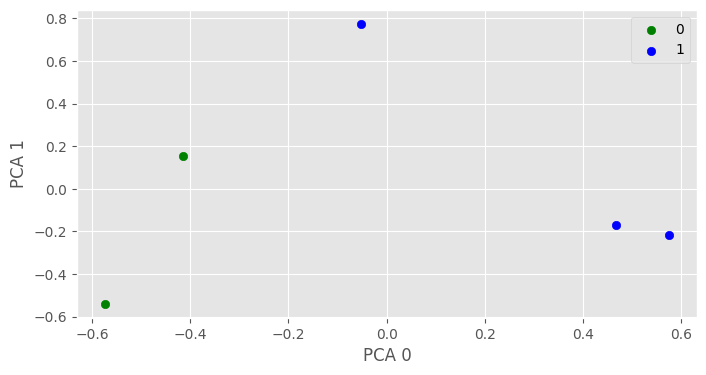

In [14]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('ggplot')

fig, ax = plt.subplots()
fig.set_size_inches(8,4)

# color map for NUMBER_OF_CLUSTERS we have
cmap = {0: 'green', 1: 'blue', 2: 'red'}

# group by clusters and scatter plot every cluster
# with a colour and a label
for group in np.unique(clusters):
    ix = np.where(clusters == group)
    ax.scatter(scatter_x[ix], scatter_y[ix], c=cmap[group], label=group)

ax.legend()
plt.xlabel("PCA 0")
plt.ylabel("PCA 1")
plt.show()

<font color="red">Most spoken words per cluster</font>

In [12]:
# Print top 10 words in every cluster.
order_centroids = km.cluster_centers_.argsort()[:, ::-1]

terms = vectorizer.get_feature_names_out()
for i in range(len(np.unique(clusters))):
    print("Cluster %d:" % i, end='')
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind], end='')
    print()

Cluster 0: playing weekends the weekends football on the football on football love playing love playing football on on the
Cluster 1: to and in enjoy enjoy hiking enjoy hiking and hiking hiking and hiking and camping in the


<font color="cyan">TESTING</font>

In [7]:
df = pd.DataFrame(datalist, columns=["Sentences"])
df["Vectors"] = list(tfidf_matrix.toarray())
df["clusers"] = km.predict(tfidf_matrix)
df

,Sentences,Vectors,clusers
0,I love playing football on the weekends,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0
1,I enjoy hiking and camping in the mountains,"[0.16195600026315327, 0.2418294487817564, 0.24...",1
2,I like to read books and watch movies,"[0.16195600026315327, 0.0, 0.0, 0.0, 0.0, 0.24...",1
3,I prefer playing video games over sports,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0
4,I love listening to music and going to concerts,"[0.14718726272371824, 0.0, 0.0, 0.219777066328...",1
